# Solving TSP using pygenetic

In this example we are going to walk through the usage of GAEngine to solve the TSP problem 
The objective would be to find shortest path distance covering all places
<b>Each permutation of places represents a potential candidate solution for the problem</b>


## 1. Chromosome Representation

Each chromosome is encoded as a permutation of the places. <br/>
For example,
For a 4 city problem, a chromosome can be represented as `[3,0,1,2]` which means city 3 is traversed first followed by city 0 followed by city 1 followed by city 2.

This can be easily achieved by using the `RangeFactory` of `pygenetic`. <br/>
The `RangeFactory` takes the following parameters for 8 X 8 Matrix
* minValue = minimum value a gene can take = 0 <br/>
* maxValue = minimum value a gene can take = 7 <br/>
* duplicates = if duplicates are allowed = False <br/>
* noOfGenes = number of genes in the chromosome = 8

In [1]:
from pygenetic import ChromosomeFactory

factory = ChromosomeFactory.ChromosomeRangeFactory(noOfGenes=8,minValue=0,maxValue=7)

You can also check if the factory works as expected by calling `createChromosome` function and observing the chromosome produced by the factory

In [2]:
# Code to test if factory works as expected
for i in range(5):
    print('Chromosome created: ', factory.createChromosome())

Chromosome created:  [7, 3, 4, 1, 0, 6, 5, 2]
Chromosome created:  [1, 0, 7, 4, 2, 6, 3, 5]
Chromosome created:  [4, 7, 5, 6, 3, 2, 1, 0]
Chromosome created:  [1, 3, 5, 4, 6, 2, 7, 0]
Chromosome created:  [6, 5, 4, 3, 7, 0, 1, 2]


### Sample input matrix for TSP problem

In [3]:
matrix = [[0,172,145,607,329,72,312,120],
          [172,0,192,494,209,158,216,92],
          [145,192,0,490,237,75,205,100],
          [607,494,490,0,286,545,296,489],
          [329,209,237,286,0,421,49,208],
          [72,158,75,545,421,0,249,75],
          [312,216,205,296,49,249,9,194],
          [120,92,100,489,208,75,194,0]]

## 2. Fitness function 
Fitness for a given chromosome is to minimize the distance travelled while covering all places. Hence, we have a minimization GA problem.


In [4]:
def fitness(chromosome, matrix):
		total = 0
		for i in range(len(chromosome)-1):
			total += matrix[chromosome[i]][chromosome[i+1]]
		return total


We need then create a `GAEngine` instance from the `pygenetic` package and set the following
* `factory` = the range factory instance we had intially created
* `population_size = 500` would be a good number for this problem
* `cross_prob = 0.8`
* `mut_prob = 0.2`
* `fitness_type = 'min'` since our GA is a minimization problem

In [5]:
from pygenetic import GAEngine, Utils
ga = GAEngine.GAEngine(factory,10,fitness_type='min',mut_prob = 0.2,cross_prob=0.6)

We can now add the fitness function we had defined to this `GAEngine` instance

In [6]:
ga.setFitnessHandler(fitness, matrix)

## 3. Determing other attributes of the GA

Many Standard Crossover, Mutation, Selection and Fitness functions are present in the `Utils` module of the `pygenetic` package.

In [7]:
from pygenetic import Utils

### Crossover
Traditional crossover methods such as 1-point, 2-point crossover cannot be used since it create duplicate genes in the offsprings. In the popularly used `distinct` crossover, the first half of the chromosome is kept the same while the second half is obtained by sequentially traversing the second chromosome and adding elements only if that element is not already present.
<img src="tsp-crossover.png" style="width:700px;">

This can be done using the `addCrossoverHandler` of the pygenetic module which takes as parameters
* crossover_function = the crossover function to be used
* weight = the weightage the crossover function needs to be given (mainly used when multiple crossovers are added)

PMX and OX are other two crossovers popularly used in TSP using GA execution

In [8]:
ga.addCrossoverHandler(Utils.CrossoverHandlers.PMX, 9)
ga.addCrossoverHandler(Utils.CrossoverHandlers.distinct, 4)
ga.addCrossoverHandler(Utils.CrossoverHandlers.OX, 3)

### Mutation

The use of the mutation technique of `swap` as shown in the diagram also ensures that each element in the chromosome is a unique number and that there are no duplicates. This is a suitable for mutation function for this problem
<img src="tsp-mutation.png" style="width:700px">

This can be done using the `addMutationHandler` of the pygenetic module which takes as parameters
* mutation_function = the mutation function to be used
* weight = the weightage the mutation function needs to be given (mainly used when multiple mutations are added)

In [9]:
ga.addMutationHandler(Utils.MutationHandlers.swap)

## Selection
The selection function `best` chooses the best (1 - cross_prob) percent of the population. Hence, this function is one of the possible selection handlers which can be used in our genetic algorithm

In [10]:
ga.setSelectionHandler(Utils.SelectionHandlers.best)

## 4. Time to Evolve

This can be easily done using the `evolve` function of the GAEngine instance. It takes the `noOfIterations` as a parameter. Let's evolve it for 100 generations

In [11]:
ga.evolve(100)

mutation_handlers_weights =  [1.0]
crossover_handlers_weights =  [0.5625, 0.8125, 1.0]
Diversity =  66.12867003047921
New mutation value =  0.38438638783456996
Members left after selection =  10
Best member after selection =  [0, 2, 3, 4, 7, 1, 5, 6]
Best fitness after selection =  1628
crossover_indices =  [2 5 4 7 3 9]
adaptive_mutation value passed =  True
mutation_indexes =  [6 1 9]
New generation members =  [[0, 2, 3, 4, 7, 1, 5, 6], [5, 3, 2, 7, 6, 1, 4, 0], [5, 1, 7, 3, 6, 0, 2, 4], [4, 6, 7, 5, 1, 2, 3, 0], [5, 7, 4, 0, 3, 1, 6, 2], [0, 1, 2, 5, 3, 7, 6, 4], [0, 2, 3, 4, 5, 1, 6, 7], [1, 2, 0, 4, 7, 6, 5, 3], [6, 1, 7, 3, 0, 4, 5, 2], [5, 1, 7, 4, 6, 0, 3, 2]]
Length of new generation  10
Diversity =  59.457009679263216
New mutation value =  0.38590612754263554
Members left after selection =  10
Best member after selection =  [0, 2, 3, 4, 7, 1, 5, 6]
Best fitness after selection =  1628
crossover_indices =  [9 7 1 6 8 3]
adaptive_mutation value passed =  True
mutation_indexes =

We can get the best member by using the `best_fitness` attribute of the `GAEngine`. 
It returns a tuple having
* chromsome having best fitness
* best fitness value

In [12]:
best = ga.best_fitness
print(best)

([1, 0, 5, 2, 7, 6, 4, 3], 948)


## 5. Plotting the Statistics

- The functionality for plotting the best, worst, average fitness values across iterations is present in `plot_statistics` function of statistics.py module. The function takes a list of attributes to be plotted.
- These attributes can be `best-fitness`,`worst-fitness`,`avg-fitness`, `'diversity`, `mutation_rate`
- The diversity and mutation rate values over iterations can also be visualized 

best-fitness [1628, 1628, 1348, 1339, 1339, 1339, 1339, 1329, 1243, 1243, 1209, 1209, 1209, 1209, 1209, 1209, 1209, 1209, 1209, 1168, 1034, 948, 948, 948, 948, 948, 948, 948, 948, 948, 948, 948, 948, 948, 948, 948, 948, 948, 948, 948, 948]
worst-fitness [2212, 2229, 2387, 2388, 2152, 2184, 2061, 2033, 1967, 1965, 2058, 1959, 1963, 1963, 1904, 1941, 1927, 2142, 2324, 1962, 1954, 1659, 1815, 1860, 1446, 1324, 1318, 1281, 1909, 1457, 1457, 1735, 1576, 1553, 1659, 1553, 1553, 1212, 1643, 1938, 1928]
avg-fitness [1919.7, 1897.2, 1869.9, 1853.9, 1756.5, 1723.6, 1699.0, 1650.8, 1618.4, 1589.9, 1619.9, 1406.3, 1378.3, 1350.9, 1443.8, 1388.9, 1431.9, 1466.4, 1504.0, 1373.7, 1375.6363636363637, 1256.3636363636363, 1217.6363636363637, 1160.6363636363637, 1106.8181818181818, 1115.3636363636363, 1107.2727272727273, 1082.0, 1200.090909090909, 1125.090909090909, 1074.8181818181818, 1107.2727272727273, 1171.090909090909, 1124.090909090909, 1216.0, 1165.8181818181818, 1072.5454545454545, 1053.272727272

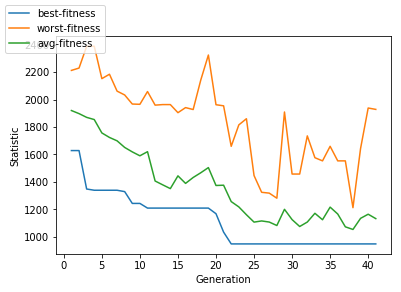

diversity [66.12867003047921, 59.457009679263216, 97.93093995260128, 91.11733644043817, 80.11070465299878, 81.6535608531557, 68.18988194739744, 57.20363624805682, 56.969325079379345, 61.58497381667057, 88.27043106272905, 69.38992001724746, 84.13216388516345, 67.68344701623877, 82.3249415426455, 83.89725263678186, 90.87677921229383, 110.32816503504444, 116.48673744250888, 72.19515911749208, 85.24464285800005, 68.16609185025014, 75.2258607642579, 75.62918155665925, 53.64912300960263, 46.50429158677701, 42.79956957169269, 36.39203436590563, 85.01759220433374, 55.69522355077812, 51.52449761273688, 73.70614997374315, 55.761068581460634, 57.58980834787266, 79.5775000386208, 70.51438141596601, 53.02009031924178, 30.275072502411884, 73.14087967401748, 96.4557255284913, 86.71113642754058]


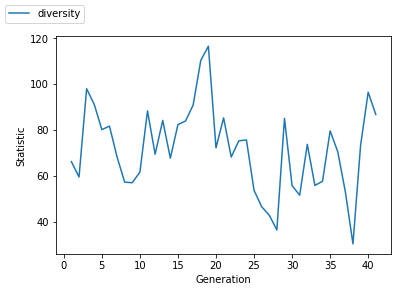

mutation_rate [0.38438638783456996, 0.38590612754263554, 0.3729085429333682, 0.3745147243184314, 0.3774194629382104, 0.3770095783790892, 0.3806167219300838, 0.3834934392747992, 0.382470563272437, 0.38111737447458144, 0.37278272010241764, 0.37828833943987566, 0.37397569521977037, 0.37879397679215693, 0.37449907799525706, 0.3740436442367934, 0.37203526344478166, 0.36655019790861093, 0.3648471058511632, 0.3767149037514821, 0.3695349382632461, 0.37316734246617805, 0.3705926663315288, 0.370446648876638, 0.3785756821317206, 0.38129548882586434, 0.3827211997719401, 0.38521238161405996, 0.3670799053778294, 0.3778039300202128, 0.3793803962841139, 0.3711438949542832, 0.37777914672053836, 0.37709212727901864, 0.3690232610053724, 0.37230696681261, 0.37881357593838794, 0.3876210389681223, 0.37134934811448683, 0.36305990836339763, 0.3664790941646107]


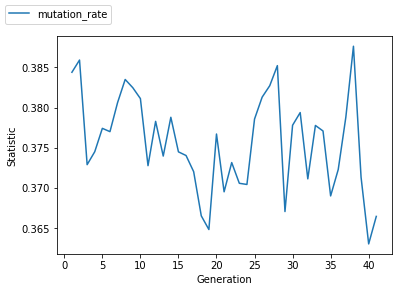

In [13]:
import matplotlib.pyplot as plt
fig = ga.statistics.plot_statistics(['best-fitness','worst-fitness','avg-fitness'])
plt.show()
fig = ga.statistics.plot_statistics(['diversity'])
plt.show()
fig = ga.statistics.plot_statistics(['mutation_rate'])
plt.show()